In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import statsmodels.api as sm

In [2]:
# 000858.XSHE 五粮液
# 002304.XSHE 洋河股份
secs = ['000858.XSHE', '002304.XSHE']


ncount = 300
end_date = '2015-3-1'

data = get_price(secs, count =  ncount, end_date= end_date, frequency='1d', fields='close',fq = "pre")['close']
data.index.name = 'Date'

绘制两只股票相应累积收益率的图形

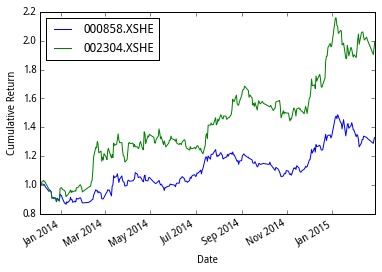

In [3]:
(1 + data.pct_change()).cumprod().plot();
plt.ylabel('Cumulative Return');

计算线性组合

In [4]:
# prepend (bool) – If true, the constant is in the first column. Else the constant is appended (last column).
# 000858：五粮液作为自变量x
# 002304：洋河股份作为因变量y

x = sm.add_constant(data[secs[0]], prepend=False)

ols = sm.OLS(data[secs[1]], x).fit()
beta = ols.params

In [5]:
print ols.summary2()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.877    
Dependent Variable: 002304.XSHE      AIC:                1481.5371
Date:               2018-10-13 14:52 BIC:                1488.9447
No. Observations:   300              Log-Likelihood:     -738.77  
Df Model:           1                F-statistic:        2126.    
Df Residuals:       298              Prob (F-statistic): 1.16e-137
R-squared:          0.877            Scale:              8.1168   
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------
000858.XSHE      3.4575   0.0750  46.1055 0.0000   3.3099   3.6051
const          -19.0435   1.2398 -15.3606 0.0000 -21.4833 -16.6037
------------------------------------------------------------------
Omnibus:              7.889         Durbin-Watson:           0.098
Prob(Omnibus

计算spread

In [6]:
beta

000858.XSHE     3.457485
const         -19.043506
dtype: float64

In [7]:
sm.add_constant(data[secs[0]], prepend=False)

,000858.XSHE,const
Date,,
2013-12-04,14.82,1
2013-12-05,14.79,1
2013-12-06,14.91,1
2013-12-09,14.87,1
2013-12-10,14.81,1
2013-12-11,14.65,1
2013-12-12,14.52,1
2013-12-13,14.45,1
2013-12-16,14.14,1


In [9]:
beta

000858.XSHE     3.457485
const         -19.043506
dtype: float64

In [8]:
spread = pd.DataFrame(data[secs[1]] - np.dot(sm.add_constant(data[secs[0]], prepend=False), beta))
spread.columns = ['Spread']

In [9]:
spread

,Spread
Date,
2013-12-04,-5.776415
2013-12-05,-5.682691
2013-12-06,-5.617589
2013-12-09,-5.159290
2013-12-10,-5.231841
2013-12-11,-4.678643
2013-12-12,-4.579170
2013-12-13,-4.527146
2013-12-16,-4.265326


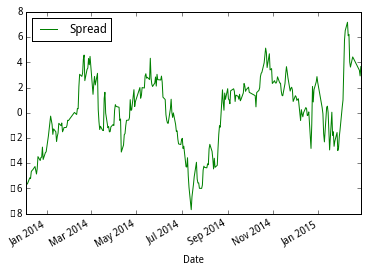

In [10]:
spread.plot(style=['g'])

Test for Cointegration
not strictly cointegrated

In [11]:
# check for cointegration
adf = sm.tsa.stattools.adfuller(spread['Spread'], maxlag=1)
print 'ADF test statistic: %.02f' % adf[0]
print 'p-value: %.03f' % adf[1]

ADF test statistic: -2.97
p-value: 0.037


Out of Sample test

begin date should be identical with end date previous


In [12]:
begin_date = '2015-3-1'
end_date_2 = '2016-3-1'

secs = ['000858.XSHE', '002304.XSHE']

data_oos = get_price(secs, start_date =  begin_date, end_date= end_date_2, frequency='1d', fields='close',fq = "pre")['close']
data.index.name = 'Date'

In [13]:
spread_oos = spread.reindex(spread.index + data_oos.index)

spread_oos['Spread OOS'] = data_oos[secs[1]] - np.dot(
        sm.add_constant(data_oos[secs[0]], prepend=False), beta)

/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/tseries/base.py:361: FutureWarning: using '+' to provide set union with datetimelike Indexes is deprecated, use .union()
  "use .union()",FutureWarning)


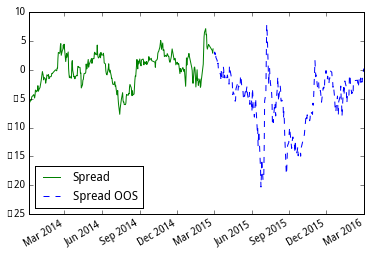

In [14]:
spread_oos.plot(style=['g', '--b', '--y', '--y', 'r']);


Kalman Filter

In [15]:
data_all = data.append(data_oos)

In [16]:
# obs_mat = sm.add_constant(data_all[secs[0]].values, prepend=False)[:, np.newaxis]
sm.add_constant(data_all[secs[0]].values, prepend=False)[:, np.newaxis]

array([[[ 14.82,   1.  ]],

       [[ 14.79,   1.  ]],

       [[ 14.91,   1.  ]],

       ..., 
       [[ 22.05,   1.  ]],

       [[ 21.13,   1.  ]],

       [[ 21.47,   1.  ]]])

In [17]:
data_all[secs[0]].values.shape

(546,)

In [18]:
sm.add_constant(data_all[secs[0]].values, prepend=False).shape

(546, 2)

In [19]:
obs_mat = sm.add_constant(data_all[secs[0]].values, prepend=False)[:, np.newaxis]
obs_mat.shape

(546, 1, 2)

In [20]:
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=np.ones(2),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=10**2,
                  transition_covariance=0.01**2 * np.eye(2))

In [21]:
data_all[secs[1]][:, np.newaxis].shape

(546, 1)

In [67]:
state_means, state_covs = kf.filter(data_all[secs[1]][:, np.newaxis])

In [68]:
beta_kf = pd.DataFrame({'Slope': state_means[:, 0], 'Intercept': state_means[:, 1]},
                   index=data_all.index)

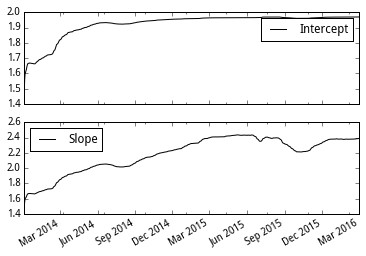

In [69]:
beta_kf.plot(subplots=True)

Spread with dynamic beta


In [71]:
spread_kf = data_all[secs[1]] - data_all[secs[0]] * beta_kf['Slope'] - beta_kf['Intercept']

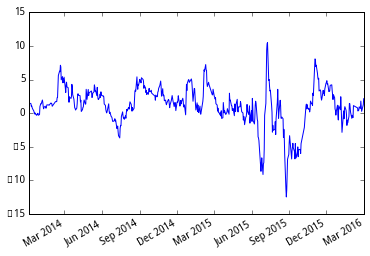

In [72]:
spread_kf.plot();


尝试一步步的进行跟踪

filter_update：Perform a one-step update to estimate the state at time t+1 give an observation at time t+1 and the previous estimate for time t given observations from times （0...t）. This method is useful if one wants to track an object with streaming observations.


In [22]:
# 准备好数据
# 观察到的观察矩阵，因为价格在波动，所以观察矩阵也在变化，但是因为观察矩阵和观察变量都在变化，所以最终推断的state状态不会发生变化
obs_mat = sm.add_constant(data_all[secs[0]].values, prepend=False)[:, np.newaxis]

# 观察到的因变量数据
y_data = data_all[secs[1]][:, np.newaxis]

In [33]:
obs_mat[0].shape

(1, 2)

In [29]:
np.ones((2, 2)).shape

(2, 2)

In [40]:
# for i in range(int(obs_mat.shape[0])):
# 对第1个状态赋初值
state_means_next = np.ones(2)
state_covs_next = np.ones((2, 2))
final_state = []
for i in range(int(obs_mat.shape[0])):
    state_means_next, state_covs_next = kf.filter_update(filtered_state_mean =state_means_next,\
                                                         filtered_state_covariance = state_covs_next,
                                                         observation  =y_data[i], \
                                                         observation_matrix = obs_mat[i] )
    
    final_state.append([state_means_next[0],state_means_next[1]])

print final_state

[[1.4787620896111542, 1.478720269937887], [1.5593732336161126, 1.5592997310887371], [1.5982118587249001, 1.5981027112579764], [1.6247697312160765, 1.6246164851092357], [1.6392979670551244, 1.6391066647087245], [1.6518073535098428, 1.6515686992582121], [1.6597985566286673, 1.6595186907374204], [1.6653715959909083, 1.6650541986744456], [1.667790688419587, 1.6674528008964813], [1.6686550477772069, 1.6683081251490863], [1.6678980587535046, 1.6675606853811804], [1.6681272758940919, 1.6677864828516913], [1.6675609785408454, 1.6672299401883222], [1.6660998580254209, 1.6657979193247663], [1.6655259866216787, 1.6652370910886154], [1.6650014628735013, 1.664726052824502], [1.6649790211668898, 1.6647042532771286], [1.6638558699167663, 1.6636171981587451], [1.6631673352696039, 1.6629530232776022], [1.666585818082255, 1.6662365773854864], [1.6711743565728634, 1.6706276125156452], [1.6754055929374643, 1.6746612359447779], [1.680991126836511, 1.6799667634294493], [1.6854188901223406, 1.684154316065372

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b65c07d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f41b652c210>], dtype=object)

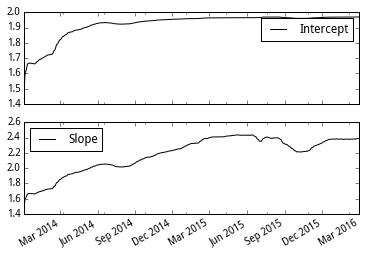

In [43]:

slope = [s[0] for s in final_state]
intercept = [s[1] for s in final_state]


beta_kf_update = pd.DataFrame({'Slope': np.array(slope), 'Intercept': np.array(intercept)},
                   index=data_all.index)

beta_kf_update.plot(subplots=True)

In [ ]:
beta_kf = pd.DataFrame({'Slope': state_means[:, 0], 'Intercept': state_means[:, 1]},
                   index=data_all.index)

beta_kf.plot(subplots=True)